## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy as sp

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,how="left",on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen
mice = combined_data["Mouse ID"].unique()
drugs = combined_data["Drug Regimen"].unique()
time = combined_data["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


In [5]:
mean_volume = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_volume = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median_volume = median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stat = [mean_volume, median_volume, variance, stdev, SEM]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [6]:
stat_analysis= pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

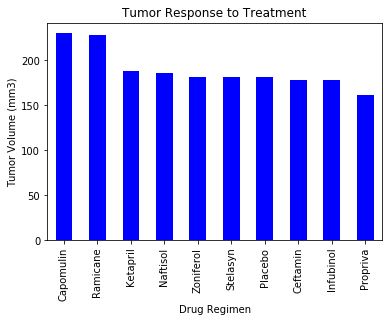

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg = combined_data["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_reg.plot(kind="bar", facecolor="blue")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

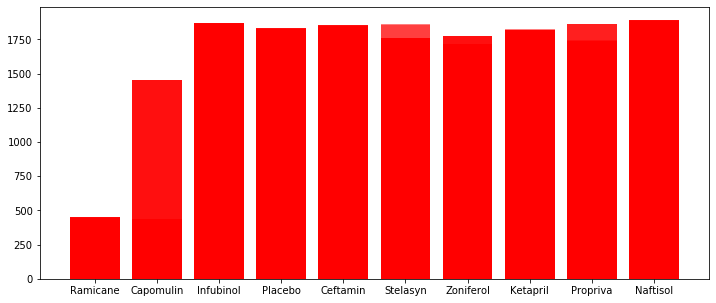

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(combined_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(combined_data["Drug Regimen"], x_axis, color='r', alpha=0.5, align="center")
plt.show()

## Pie plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = pd.DataFrame(combined_data["Sex"].value_counts())
gender_count

,Sex
Male,958
Female,935


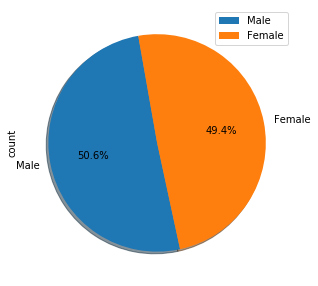

In [18]:
gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)

C:\Users\Public\Anaconda3\envs\PythonData1\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


([<matplotlib.patches.Wedge at 0x2236c2a32b0>,
 [Text(-1.1775773804745815, -0.230892860423667, 'Male'),
  Text(1.0794459321016998, 0.21165178872169366, 'Female')],
 [Text(-0.6869201386101724, -0.13468750191380574, '50.6%'),
  Text(0.5887886902372907, 0.11544643021183289, '49.4%')])

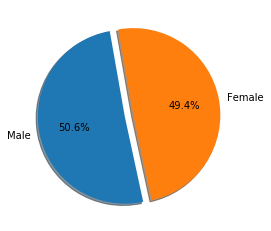

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = pd.DataFrame(combined_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=100)

## Quartiles, outliers and boxplots

In [12]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.


In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [16]:
#Calculate the correlation coefficient and linear regression model for 
#mouse weight and average tumor volume for the Capomulin regimen